# Model Dynamics

In [2]:
import sys
sys.path.append('../')
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale=3.0)

from network import run_network_recall, train_network
from connectivity import designed_matrix_sequences
from analysis import get_recall_duration_for_pattern, get_recall_duration_sequence

## Simple example
First we get the connectivity matrix by design

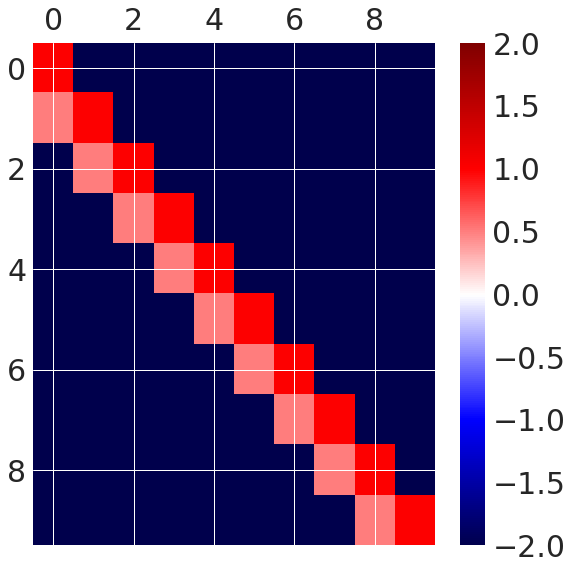

In [9]:
N = 10
sequences = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
self_excitation = 1.0
transition = 0.5
inhibition = 2.0

w = designed_matrix_sequences(N, sequences, self_excitation=self_excitation, transition=transition, 
                              inhbition=inhibition)


symmetric = np.max((np.max(w), np.abs(np.min(w))))
plt.matshow(w, aspect='auto', vmin=-symmetric, vmax=symmetric, cmap='seismic')
plt.colorbar();

Now we do the **recall**

In [23]:
G = 100.0
tau_m = 0.010
T = 2.0
I_cue = 0
T_cue = 0.050
dt = 0.001

threshold = 0.5
tau_z = 0.050

dic = run_network_recall(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)

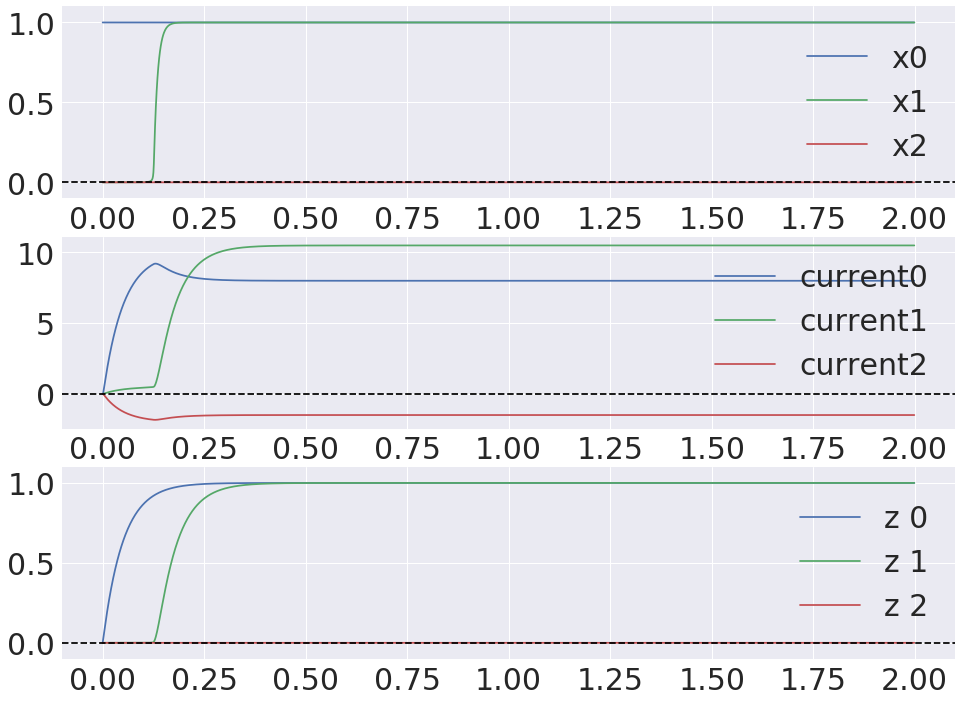

In [24]:
time = np.arange(0, T, dt)
x_history = dic['x']
z_history = dic['z']
current_history = dic['current']

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

patterns = [0, 1, 2]
# patterns = sequence
for pattern in patterns:
    ax1.plot(time, x_history[:, pattern], label='x' + str(pattern))
    ax2.plot(time, current_history[:, pattern], label='current' + str(pattern))
    ax3.plot(time, z_history[:, pattern], label='z ' + str(pattern))
    
ax1.axhline(0, ls='--', color='black')
ax1.legend();
ax1.set_ylim([-0.1, 1.1])
ax3.set_ylim([-0.1, 1.1])

ax2.axhline(0, ls='--', color='black')
ax2.legend();

ax3.axhline(0, ls='--', color='black')
ax3.legend();

And we extra the training time

In [14]:
pattern = 2
duration = get_recall_duration_for_pattern(x_history, pattern, dt)
print('duration', duration)

duration 0.19


## Systematic exploration of duration with recalling patterns

What do we have to loop? something that looks like the following

In [45]:
N = 10
sequences = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
self_excitation = 2.5
transition = 0.6
inhibition = 2.0

G = 100.0
tau_m = 0.010
T = 2.0
I_cue = 0
T_cue = 0.050
dt = 0.001

threshold = 0.5
tau_z = 0.050

w = designed_matrix_sequences(N, sequences, self_excitation=self_excitation, transition=transition, 
                              inhbition=inhibition)


x_history = dic['x']
dic = run_network_recall(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)

pattern = 2
duration = get_recall_duration_for_pattern(x_history, pattern, dt)
print('duration', duration)

duration nan


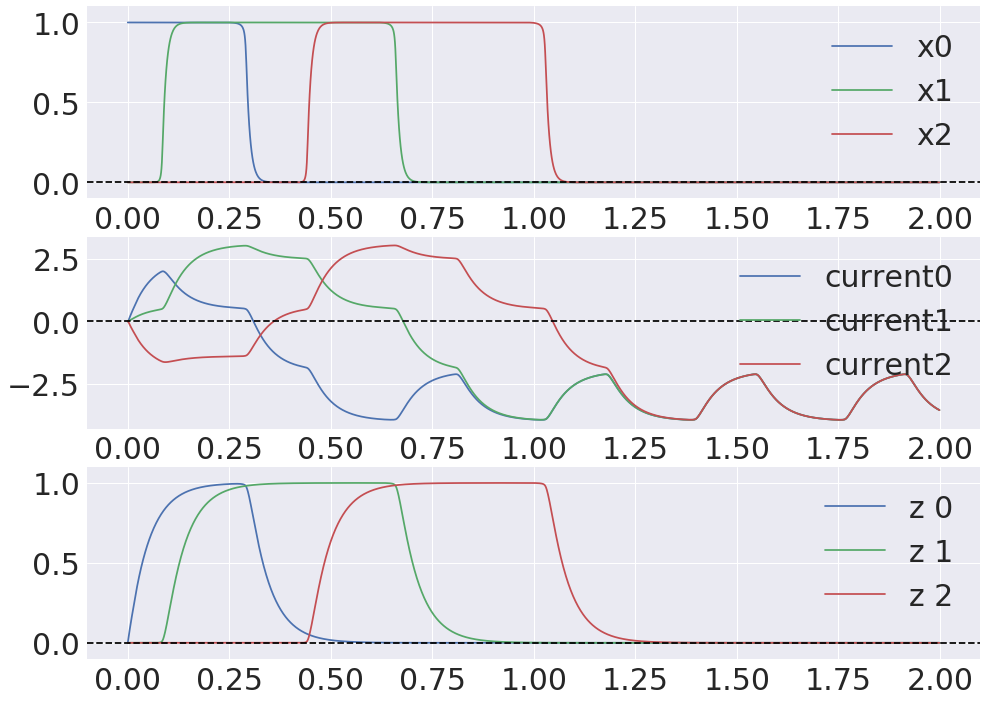

In [46]:
time = np.arange(0, T, dt)
x_history = dic['x']
z_history = dic['z']
current_history = dic['current']

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

patterns = [0, 1, 2]
# patterns = sequence
for pattern in patterns:
    ax1.plot(time, x_history[:, pattern], label='x' + str(pattern))
    ax2.plot(time, current_history[:, pattern], label='current' + str(pattern))
    ax3.plot(time, z_history[:, pattern], label='z ' + str(pattern))
    
ax1.axhline(0, ls='--', color='black')
ax1.legend();
ax1.set_ylim([-0.1, 1.1])
ax3.set_ylim([-0.1, 1.1])

ax2.axhline(0, ls='--', color='black')
ax2.legend();

ax3.axhline(0, ls='--', color='black')
ax3.legend();

#### Self-excitation
Let's take a look at the role of self-excitation

In [71]:
N = 10
sequences = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
self_excitation = 1.0
transition = 0.5
inhibition = 2.0

G = 100.0
tau_m = 0.010
T = 2.0
I_cue = 0
T_cue = 0.050
dt = 0.001

threshold = 0.5
tau_z = 0.050

pattern = 2
self_excitation_vector = np.arange(0.9, 2.6, 0.05)
recall_times = []
for self_excitation in self_excitation_vector:
    w = designed_matrix_sequences(N, sequences, self_excitation=self_excitation, transition=transition, 
                              inhbition=inhibition)

    dic = run_network_recall(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)
    x_history = dic['x']

    duration = get_recall_duration_for_pattern(x_history, pattern, dt)
    recall_times.append(duration)


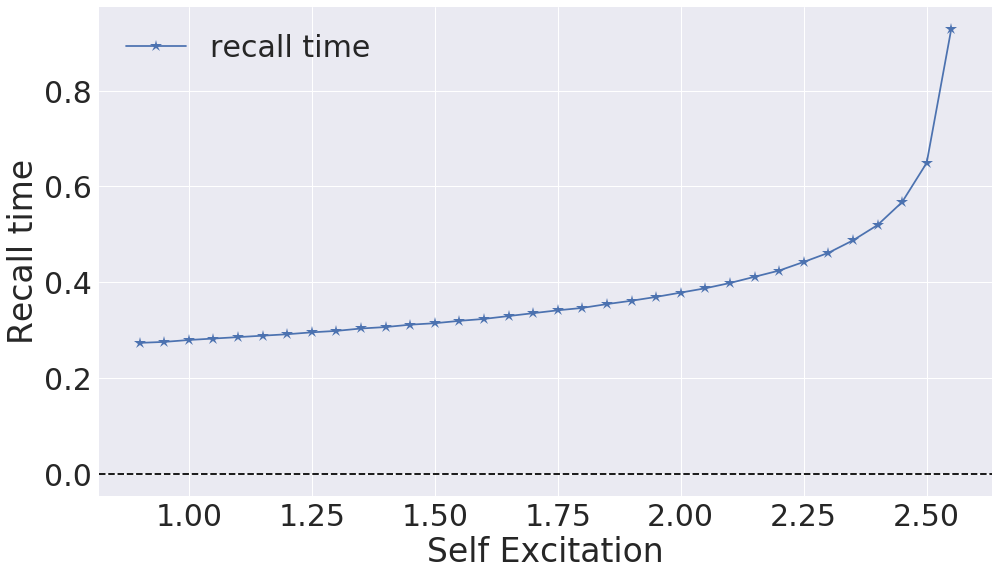

In [72]:
plt.plot(self_excitation_vector, recall_times, '*-', markersize=13, label='recall time');
plt.axhline(0, ls='--', color='black')

plt.xlabel('Self Excitation')
plt.ylabel('Recall time')
plt.legend();

#### Inhibition

In [83]:
N = 10
sequences = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
self_excitation = 1.0
transition = 0.5
inhibition = 2.0

G = 100.0
tau_m = 0.010
T = 2.0
I_cue = 0
T_cue = 0.050
dt = 0.001

threshold = 0.5
tau_z = 0.050

pattern = 2
inhibition_vector = np.arange(0.45, 2.5, 0.05)
recall_times = []
for inhibition in inhibition_vector:
    w = designed_matrix_sequences(N, sequences, self_excitation=self_excitation, transition=transition, 
                              inhbition=inhibition)

    dic = run_network_recall(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)
    x_history = dic['x']
    duration = get_recall_duration_for_pattern(x_history, pattern, dt)
    recall_times.append(duration)


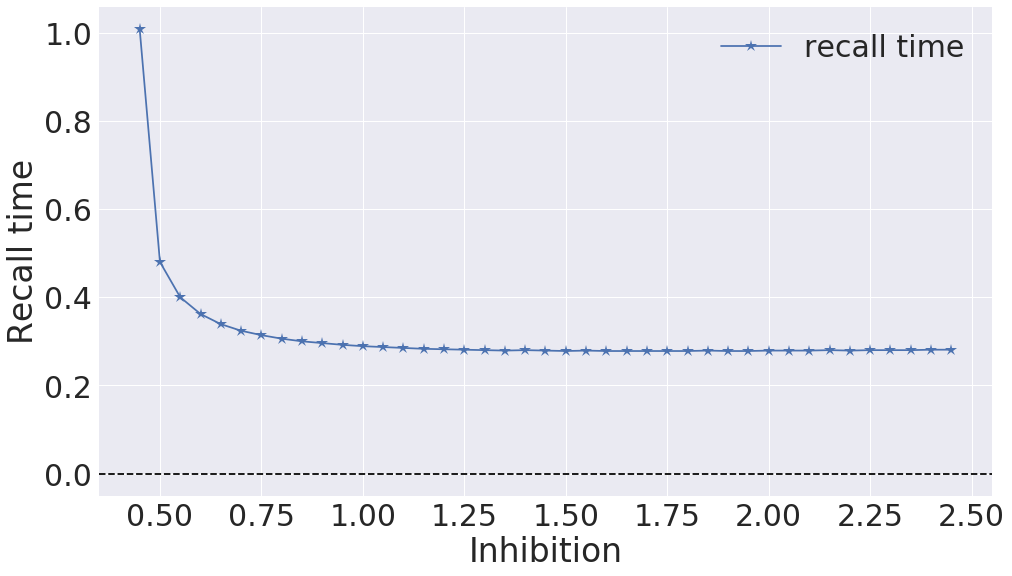

In [84]:
plt.plot(inhibition_vector, recall_times, '*-', markersize=13, label='recall time');
plt.axhline(0, ls='--', color='black')

plt.xlabel('Inhibition')
plt.ylabel('Recall time')
plt.legend();

##### Transition

In [98]:
N = 10
sequences = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
self_excitation = 1.0
transition = 0.5
inhibition = 2.0

G = 100.0
tau_m = 0.010
T = 2.0
I_cue = 0
T_cue = 0.050
dt = 0.001

threshold = 0.5
tau_z = 0.050

pattern = 2
transition_vector = np.arange(0.45, 2.0, 0.05)
recall_times = []
for transition in transition_vector:
    w = designed_matrix_sequences(N, sequences, self_excitation=self_excitation, transition=transition, 
                              inhbition=inhibition)

    dic = run_network_recall(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)
    x_history = dic['x']
    duration = get_recall_duration_for_pattern(x_history, pattern, dt)
    recall_times.append(duration)


0.548
0.279
0.232
0.207
0.191
0.178
0.169
0.16
0.153
0.147
0.141
0.138
0.134
0.131
0.128
0.126
0.124
0.122
0.121
0.119
0.118
0.116
0.115
0.114
0.114
0.113
0.113
0.112
0.112
0.111
0.111


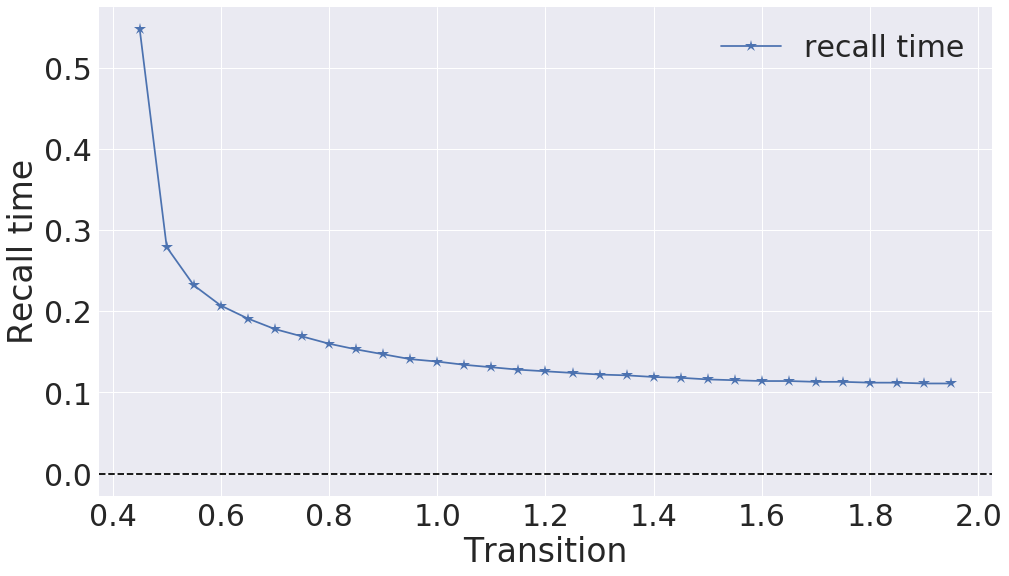

In [99]:
plt.plot(transition_vector, recall_times, '*-', markersize=13, label='recall time');
plt.axhline(0, ls='--', color='black')

plt.xlabel('Transition')
plt.ylabel('Recall time')
plt.legend();

In [100]:
N = 10
sequences = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
self_excitation = 1.0
transition = 0.5
inhibition = 2.0

G = 100.0
tau_m = 0.010
T = 2.0
I_cue = 0
T_cue = 0.050
dt = 0.001

threshold = 0.5
tau_z = 0.050

pattern = 2
transition_vector = np.arange(0.44, 1.0, 0.01)
recall_times = []
for transition in transition_vector:
    w = designed_matrix_sequences(N, sequences, self_excitation=self_excitation, transition=transition, 
                              inhbition=inhibition)

    dic = run_network_recall(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)
    x_history = dic['x']
    duration = get_recall_duration_for_pattern(x_history, pattern, dt)
    recall_times.append(duration)



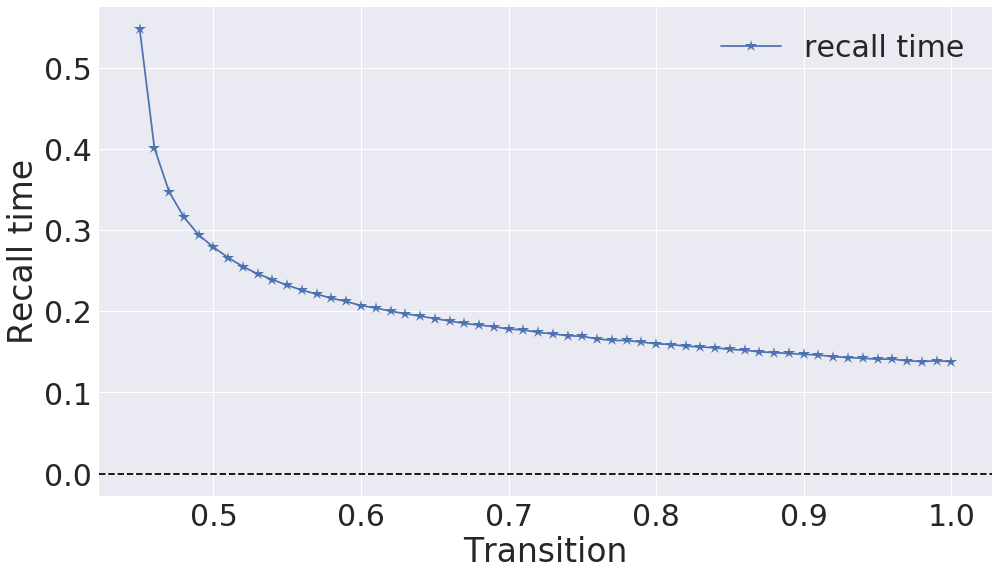

In [101]:
plt.plot(transition_vector, recall_times, '*-', markersize=13, label='recall time');
plt.axhline(0, ls='--', color='black')

plt.xlabel('Transition')
plt.ylabel('Recall time')
plt.legend();

In [119]:
N = 10
sequences = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
self_excitation = 1.0
transition = 0.5
inhibition = 2.0

G = 100.0
tau_m = 0.010
T = 3.0
I_cue = 0
T_cue = 0.050
dt = 0.001

threshold = 0.5
tau_z = 0.050

pattern = 2
transition_vector = np.arange(0.4450, 0.5, 0.0001)
recall_times = []
for transition in transition_vector:
    w = designed_matrix_sequences(N, sequences, self_excitation=self_excitation, transition=transition, 
                              inhbition=inhibition)

    dic = run_network_recall(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)
    x_history = dic['x']
    duration = get_recall_duration_for_pattern(x_history, pattern, dt)
    print(duration)
    recall_times.append(duration)


0.98
1.036
0.999
0.966
0.938
0.912
0.889
0.868
0.848
0.831
0.814
0.8
0.785
0.772
0.76
0.748
0.737
0.727
0.717
0.708
0.699
0.691
0.683
0.675
0.668
0.661
0.655
0.648
0.642
0.636
0.631
0.625
0.619
0.614
0.609
0.605
0.6
0.596
0.592
0.587
0.583
0.579
0.576
0.571
0.568
0.565
0.561
0.557
0.555
0.551
0.548
0.545
0.542
0.539
0.536
0.533
0.531
0.528
0.525
0.523
0.52
0.518
0.516
0.514
0.511
0.509
0.507
0.504
0.503
0.5
0.498
0.496
0.494
0.493
0.491
0.488
0.487
0.485
0.483
0.482
0.479
0.478
0.476
0.474
0.474
0.472
0.47
0.468
0.467
0.465
0.464
0.462
0.461
0.46
0.458
0.457
0.455
0.454
0.452
0.451
0.451
0.449
0.448
0.446
0.446
0.444
0.442
0.442
0.44
0.439
0.438
0.437
0.436
0.434
0.434
0.433
0.432
0.43
0.429
0.428
0.427
0.426
0.425
0.424
0.423
0.422
0.421
0.421
0.42
0.419
0.418
0.416
0.416
0.415
0.414
0.414
0.412
0.412
0.411
0.41
0.409
0.409
0.407
0.407
0.406
0.405
0.404
0.403
0.403
0.401
0.401
0.4
0.4
0.398
0.398
0.397
0.397
0.396
0.396
0.394
0.394
0.393
0.392
0.392
0.391
0.39
0.39
0.389
0.388
0.388
0

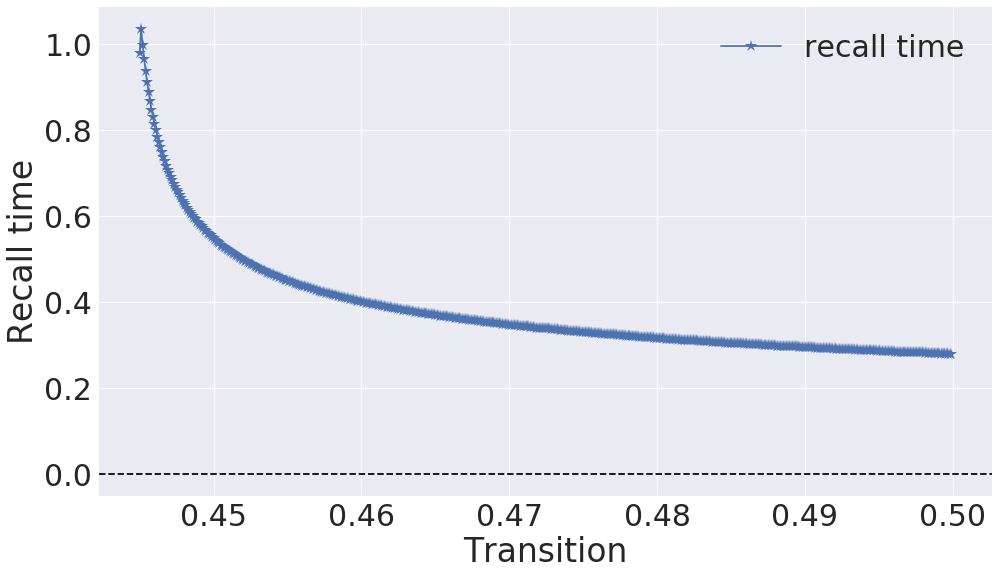

In [120]:
plt.plot(transition_vector, recall_times, '*-', markersize=13, label='recall time');
plt.axhline(0, ls='--', color='black')

plt.xlabel('Transition')
plt.ylabel('Recall time')
plt.legend();